# auto feature twitter

## 1. Load Datasets

In [1]:
import pandas as pd
from utils import Timer
from pathlib import Path

import os, sys
pathlib = str(Path(os.path.abspath('')).parent.parent.parent.parent.resolve())
sys.path.append(pathlib)
print(pathlib)

train_data = pd.read_parquet(f"{pathlib}/tests/data/test_twitter_recsys.parquet")
print("input data is ")
display(train_data)
train_data.dtypes


/home/vmagent/app/recdp
input data is 


,text_tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,...,engaged_with_user_following_count,engaged_with_user_is_verified,engaged_with_user_account_creation,engaging_user_id,engaging_user_follower_count,enaging_user_following_count,enaging_user_is_verified,engaging_user_account_creation,engagee_follows_engager,reply
0,101\t157\t39554\t117\t51747\t10479\t27874\t101...,None,0C8E7372269942BB173EED7C0A72DA09,None,None,None,Quote,488B32D24BD4BB44172EB981C1BCA6FA,2021-02-28 14:49:42,8B7BB615A39DF112B0037E960C27F220,...,123,False,2020-08-02 17:13:46,3044AFDB7E977FB7F62D49C5C97794B7,1128,4028,False,2014-12-28 10:37:53,False,0
1,101\t14120\t131\t120\t120\t188\t119\t11170\t12...,None,858720854891DFED04A5B91758049833,Photo,None,None,TopLevel,313ECD3A1E5BB07406E4249475C2D6D6,2021-02-26 10:30:36,74B09D5BC3FCE5CC4DEE34BF049A0EE5,...,17,False,2020-02-13 18:36:45,23ACD97ACEF57BF6416670BE1133A664,72,115,False,2020-09-14 04:40:07,False,0
2,101\t56898\t137\t10279\t10908\t10138\t168\t398...,90C52DDF506D1C98EE678E84C08C36AB\tCD8639BABE54...,1988AA4069C46F57990B6983FBD427A6,None,D249E94F6D37A7D5E37185E02C94CDFF,9EFF000CDB18B710CDDB43EE1D8C300B,Retweet,E7F038DE3EAD397AEC9193686C911677,2021-03-01 17:02:33,316C2BE47E445DA930E56C12F3AF31C5,...,23,False,2009-06-15 03:32:36,99F829F88A12BF8B92EDF11A10B6533C,130,638,False,2009-11-01 11:58:13,False,0
3,101\t56898\t137\t12275\t10738\t11534\t15417\t9...,D704B4128E35F9BC995E701523676542\tCFD3AF9039C6...,89C86150124016236B7D4A286B041210,None,None,None,Retweet,E7F038DE3EAD397AEC9193686C911677,2021-03-02 19:55:32,C19FC40FBF0AA0BAC4797BD47483349B,...,1273,False,2015-11-14 05:15:25,A3A7B6D928FAD730BA9967B53EA7CC28,234,640,False,2020-09-10 08:10:09,False,0
4,101\t109821\t24093\t14703\t30118\t11259\t160\t...,None,971197A8E595128D8BAF8F3F9D20CFF3,Photo\tPhoto,None,None,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,2021-03-01 00:38:33,46846BF25E56F8BA11C0AE36ED31B28F,...,976,False,2019-09-19 22:02:19,BA94D75FC03B42F88CAE61485E075960,8,208,False,2018-07-29 15:59:42,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,101\t10882\t169\t12928\t10894\t13028\t16863\t1...,None,2227FE4B3B1D59BE04F11FBCE146E96B,None,None,None,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,2021-02-28 22:11:16,2969768AB934329E3F77C6BF9389D2EC,...,6355,False,2020-05-25 22:12:02,5DAD7F04EF963C9AA67A2301A8B82D81,359,413,False,2020-06-01 11:52:22,True,0
9996,101\t56898\t137\t23152\t10350\t16039\t10815\t1...,None,4CD4E99F32B693D7127185B99BBC16EC,None,None,None,Retweet,488B32D24BD4BB44172EB981C1BCA6FA,2021-03-03 01:44:43,7C5CA5A790B34D58C92A6B1D66A5C29C,...,2360,False,2007-07-08 01:47:26,01449F871D9C25CD15A99A5BA7080B32,1036,2195,False,2011-03-12 16:31:57,False,0
9997,101\t56898\t137\t12322\t35713\t168\t162\t62146...,None,076F276223FEE8B65A8394000DDE1FF8,Photo,None,None,Retweet,E7F038DE3EAD397AEC9193686C911677,2021-03-02 21:00:48,5BF5EB3CB78D855670FE5E823FD09C19,...,17598,False,2017-10-28 13:06:19,604AE4955F348F51DC45B3186DB5AE6E,259,913,False,2019-05-04 12:53:41,True,0
9998,101\t11835\t46090\t10327\t11503\t24499\t78578\...,5DF4827AA8F4AA4168CAC78DC7821AA4\tEA2DBD95359D...,E48DD62AF5F4970DFC1D8F9080DCC55C,None,None,None,TopLevel,5B6973BEB05212E396F3F2DC6A31B71C,2021-03-03 11:37:57,8BBCDE5904602037AB3863910C5E724B,...,8654,False,2020-03-02 22:16:41,C094354FC31B6759C0FCC2EA886A0A11,342,370,False,2020-05-11 19:44:37,True,0


text_tokens                           object
hashtags                              object
tweet_id                              object
present_media                         object
present_links                         object
present_domains                       object
tweet_type                            object
language                              object
tweet_timestamp                       object
engaged_with_user_id                  object
engaged_with_user_follower_count       int64
engaged_with_user_following_count      int64
engaged_with_user_is_verified           bool
engaged_with_user_account_creation    object
engaging_user_id                      object
engaging_user_follower_count           int64
enaging_user_following_count           int64
enaging_user_is_verified                bool
engaging_user_account_creation        object
engagee_follows_engager                 bool
reply                                  int64
dtype: object

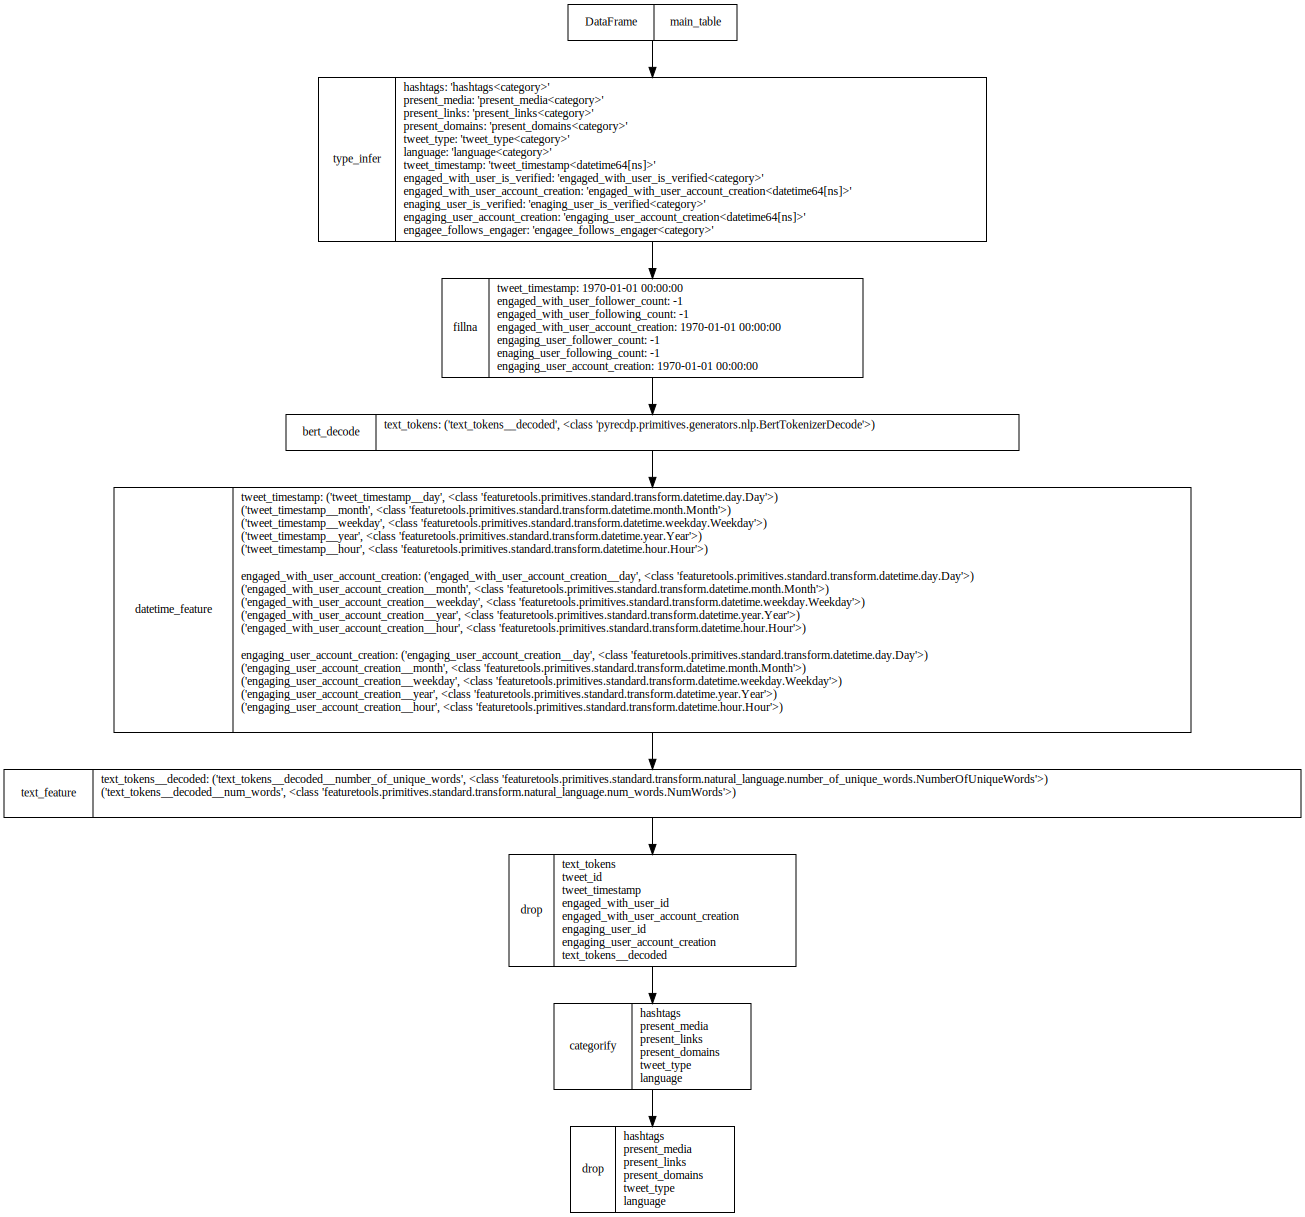

In [2]:
from pyrecdp.autofe import FeatureWrangler
pipeline = FeatureWrangler(dataset=train_data, label="reply")
pipeline.plot()

In [3]:
transformed = pipeline.fit_transform()
transformed

execute DataFrame started ...
execute DataFrame took 1.2904871255159378e-05 sec
execute type_infer started ...
execute type_infer took 0.03731792978942394 sec
execute fillna started ...
execute fillna took 0.003410384990274906 sec
execute bert_decode started ...
execute bert_decode took 3.04196764761582 sec
execute datetime_feature started ...
execute datetime_feature took 0.02200351795181632 sec
execute text_feature started ...
execute text_feature took 0.23568265978246927 sec
execute drop started ...
execute drop took 0.004343768116086721 sec
execute categorify started ...
execute categorify took 0.004338240250945091 sec
execute drop started ...
execute drop took 0.0020596557296812534 sec


,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaging_user_follower_count,enaging_user_following_count,enaging_user_is_verified,engagee_follows_engager,reply,tweet_timestamp__day,tweet_timestamp__month,...,engaging_user_account_creation__year,engaging_user_account_creation__hour,text_tokens__decoded__number_of_unique_words,text_tokens__decoded__num_words,hashtags__idx,present_media__idx,present_links__idx,present_domains__idx,tweet_type__idx,language__idx
0,956,123,False,1128,4028,False,False,0,28,2,...,2014,10,45,57,-1,-1,-1,-1,0,0
1,8723,17,False,72,115,False,False,0,26,2,...,2020,4,6,6,-1,0,-1,-1,1,1
2,86709,23,False,130,638,False,False,0,1,3,...,2009,11,44,53,0,-1,0,0,2,2
3,2445,1273,False,234,640,False,False,0,2,3,...,2020,8,45,64,1,-1,-1,-1,2,2
4,20672,976,False,8,208,False,False,0,1,3,...,2018,15,15,15,-1,1,-1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6682,6355,False,359,413,False,True,0,28,2,...,2020,11,16,17,-1,-1,-1,-1,1,0
9996,53055,2360,False,1036,2195,False,False,0,3,3,...,2011,16,22,22,-1,-1,-1,-1,2,0
9997,18422,17598,False,259,913,False,True,0,2,3,...,2019,12,20,23,-1,0,-1,-1,2,2
9998,8644,8654,False,342,370,False,True,0,3,3,...,2020,19,22,27,1924,-1,-1,-1,1,15


In [4]:
transformed.dtypes

engaged_with_user_follower_count                   int64
engaged_with_user_following_count                  int64
engaged_with_user_is_verified                   category
engaging_user_follower_count                       int64
enaging_user_following_count                       int64
enaging_user_is_verified                        category
engagee_follows_engager                         category
reply                                              int64
tweet_timestamp__day                               int64
tweet_timestamp__month                             int64
tweet_timestamp__weekday                           int64
tweet_timestamp__year                              int64
tweet_timestamp__hour                              int64
engaged_with_user_account_creation__day            int64
engaged_with_user_account_creation__month          int64
engaged_with_user_account_creation__weekday        int64
engaged_with_user_account_creation__year           int64
engaged_with_user_account_creat

In [5]:
pipeline.export()

{0: {'children': None, 'op': 'DataFrame', 'config': 'main_table'}, 1: {'children': [0], 'op': 'type_infer', 'config': {'hashtags': 'hashtags<category>', 'present_media': 'present_media<category>', 'present_links': 'present_links<category>', 'present_domains': 'present_domains<category>', 'tweet_type': 'tweet_type<category>', 'language': 'language<category>', 'tweet_timestamp': 'tweet_timestamp<datetime64[ns]>', 'engaged_with_user_is_verified': 'engaged_with_user_is_verified<category>', 'engaged_with_user_account_creation': 'engaged_with_user_account_creation<datetime64[ns]>', 'enaging_user_is_verified': 'enaging_user_is_verified<category>', 'engaging_user_account_creation': 'engaging_user_account_creation<datetime64[ns]>', 'engagee_follows_engager': 'engagee_follows_engager<category>'}}, 2: {'children': [1], 'op': 'fillna', 'config': {'tweet_timestamp': Timestamp('1970-01-01 00:00:00'), 'engaged_with_user_follower_count': -1, 'engaged_with_user_following_count': -1, 'engaged_with_user_